In [332]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Like_count_mean를 넣는게 말이 됨

In [333]:
data1 = pd.read_csv('유튜버_최근영상_정보_0_400.csv')
data2 = pd.read_csv('유튜버_최근영상_정보_400_800.csv')
data3 = pd.read_csv('유튜버_최근영상 정보_800_1200.csv')
data4 = pd.read_csv('유튜버_최근영상_정보_1200_1600.csv')
data5 = pd.read_csv('유튜버_최근영상_정보_1601_2000.csv')
data6 = pd.read_csv('paid.csv')

In [ ]:
df1 = pd.

In [334]:
df1 = pd.concat([data1, data2, data3, data4, data5], axis = 0)

In [336]:
df2 = pd.read_csv('paid.csv')
df2 = df2[['유튜버','product_category']]
df = pd.merge(df1, df2, on='유튜버', how='outer')

In [354]:
df1

,id,카테고리,검색어,유튜버,비교구독자수,구독자수,유튜버정보,제목,조회수,좋아요,업로드시간,링크,더보기란,유료광고유무
0,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,예쁜게 죄,"조회수 203,721회","나 외에 사용자 2,345명이 이 동영상을 좋아함",2023. 5. 20.,https://www.youtube.com/watch?v=S-EUICYy2o0,#유소나 #토크💟광고문의usona_official@naver.com💟인스타@uson...,0
1,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,피파천재 유소나,"조회수 55,040회",나 외에 사용자 705명이 이 동영상을 좋아함,2023. 5. 17.,https://www.youtube.com/watch?v=o-Oi6adANXs,#유소나 #피파4 #레알마드리드💟광고문의usona_official@naver.com...,0
2,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,카드깡을 맛본 부자 누나,"조회수 211,664회","나 외에 사용자 1,829명이 이 동영상을 좋아함",2023. 5. 15.,https://www.youtube.com/watch?v=HSQPl-GUfh0,#유소나 #피파4 #두치와뿌꾸💟광고문의usona_official@naver.com💟...,0
3,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,수면마취 덜 깬 소나ㅋㅋㅋㅋㅋ,"조회수 124,988회","나 외에 사용자 1,180명이 이 동영상을 좋아함",2023. 5. 12.,https://www.youtube.com/watch?v=gpR6Y5R1u-0,#유소나 #수면마취 #토크💟광고문의usona_official@naver.com💟인스...,0
4,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,나도 가끔 이런거 입는다,"조회수 287,425회","나 외에 사용자 2,931명이 이 동영상을 좋아함",2023. 5. 10.,https://www.youtube.com/watch?v=IEWBTXpquxQ,#유소나 #하정우 #블루워터💙유소나X블루워터 콜라보 기념 단기 특별할인💙 : htt...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,7 MIN SIXPACK ABS WORKOUT AT HOME (No Equipmen...,"조회수 7,567회",나 외에 사용자 530명이 이 동영상을 좋아함,2023. 5. 21.,https://www.youtube.com/watch?v=cYsx-GadnuI,"Hello, I am Jaeho, a trainer and physical ther...",0
1832,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,15 MIN FULL BODY WORKOUT AT HOME (Fat burn | N...,"조회수 13,827회",나 외에 사용자 814명이 이 동영상을 좋아함,2023. 5. 14.,https://www.youtube.com/watch?v=BGXGdUj93BM,"Hello, I am Jaeho, a trainer and physical ther...",0
1833,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,7 MIN SIX PACK ABS WORKOUT AT HOME | Beginner ...,"조회수 42,766회","나 외에 사용자 1,983명이 이 동영상을 좋아함",2023. 5. 7.,https://www.youtube.com/watch?v=QZS3cbXJaHc,"Hello, this is Jaeho, a trainer and physical t...",0
1834,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,"CHEST, SHOULDER & ABS WORKOUT at Home (6 Pack ...","조회수 12,736회",나 외에 사용자 666명이 이 동영상을 좋아함,2023. 4. 30.,https://www.youtube.com/watch?v=vmu_evx2Zc4,"Hello, I am Jaeho, a trainer and physical ther...",0


In [340]:
product_categories = df2['product_category'].value_counts().index.tolist()
df['product_category'] = df['product_category'].fillna(pd.Series(np.random.choice(product_categories, size=len(df.index))))

['Beauty and Fashion',
 'Technology',
 'Automotive',
 'Entertainment and Media',
 'Travel and Tourism',
 'Home and Lifestyle',
 'Food and Beverage',
 'Gaming',
 'Financial Services',
 'ntertainment and Media']

In [ ]:
df[]

In [342]:
df['product_category'] = df['product_category'].fillna(pd.Series(np.random.choice(product_categories, size=len(df.index))))

Beauty and Fashion         1267
Technology                 1014
Automotive                  897
Entertainment and Media     859
Home and Lifestyle          815
Travel and Tourism          804
Food and Beverage           791
ntertainment and Media      780
Gaming                      751
Financial Services          744
Name: product_category, dtype: int64

In [357]:
product_categories = ['Beauty and Fashion',
 'Technology',
 'Automotive',
 'Entertainment and Media',
 'Travel and Tourism',
 'Home and Lifestyle',
 'Food and Beverage',
 'Gaming',
 'Financial Services',
 'ntertainment and Media']

In [359]:
product_categories = ['Beauty and Fashion',
 'Technology',
 'Automotive',
 'Entertainment and Media',
 'Travel and Tourism',
 'Home and Lifestyle',
 'Food and Beverage',
 'Gaming',
 'Financial Services',
 'ntertainment and Media']
category_to_number = {category: number for number, category in enumerate(product_categories)}


{'Beauty and Fashion': 0,
 'Technology': 1,
 'Automotive': 2,
 'Entertainment and Media': 3,
 'Travel and Tourism': 4,
 'Home and Lifestyle': 5,
 'Food and Beverage': 6,
 'Gaming': 7,
 'Financial Services': 8,
 'ntertainment and Media': 9}

In [343]:
category_to_number = {category: number for number, category in enumerate(product_categories)}
df['product_category'] = df['product_category'].map(category_to_number)
# 비교구독자수가 없으면 제거 
df = df.dropna(subset = ['비교구독자수'])
# 카테고리 문자열로 변환 TECH 2 INFO 3 카테고리 변환
def str_convert(s):
    s = s.replace('[', '')
    s = s.replace(']', '')
    s = s.replace("'", '')
    return s
df['category'] = df['카테고리'].apply(str_convert)
# 카테고리 문자열로 변환 TECH 2 INFO 3 카테고리 변환
category_labels = {
    'FOOD': 1,
    'TECH': 2,
    'INFO': 3,
    'BEAUTY': 4,
    'FILM': 5,
    'FASHION': 6,
    'PET': 7,
    'FUN': 8,
    'TRAVEL': 9,
    'ECONOMY': 10,
    'ENTN': 11,
    'GAME': 12,
    'CAR': 13,
    'LIFE': 14,
    'SPORTS': 15
}
df['category'] = df['category'].map(category_labels)
df['category'] = df['category'].astype('category').cat.codes
# 좋아요 개수
def like_convert(s):
    num = ''
    for char in s:
        if char.isdigit():
            num += char
    if num == '':
        return 0
    else: 
        return int(num)
# 구독자 조회수 좋아요 개수 
df['like_count'] = df['좋아요'].apply(like_convert)
df['view_count'] = df['조회수'].apply(like_convert)
df['subscriber_count'] = df['비교구독자수']
def upload(s):
    s = s.replace('최초 공개:', '')
    s = s.replace(' ', '')
    return s
# 업로드시간 처리
df['업로드시간'] = df['업로드시간'].apply(upload)

In [345]:
# 업로드 시간을 타임으로 변환
df['upload_time']= pd.to_datetime(df['업로드시간'], format = '%Y.%m.%d.', errors = 'coerce')
mean_upload_time = df['upload_time'].mean()

# NaN 값을 평균값
def replace_nan_with_mean(value, mean):
    if pd.isnull(value):
        return mean
    else:
        return value

df['upload_time'] = df['upload_time'].apply(lambda x: replace_nan_with_mean(x, mean_upload_time))

In [347]:
# 조회수로 부터 얼마나 날짜 차이 있는지 계산
today = datetime.today().date()

df['date_difference'] = (today - df['upload_time'].dt.date).dt.days
df = df.rename(columns = {'유료광고유무': 'paid_advertised'})
# like 수의 평균
df['like_count_mean'] = df.groupby('유튜버')['like_count'].transform('mean')

In [348]:
# 5-20만 2000 20000-40000 3000 40-60 3500 60-80 4000 80-100 4500 100-150 5000 150-300 6000

In [349]:
# budget 값
def get_budget(value):
    if value <= 200000:
        return 2000
    elif value <= 400000:
        return 3000
    elif value <= 600000:
        return 3500
    elif value <= 800000:
        return 4000
    elif value <= 1000000:
        return 4500
    elif value <= 1500000:
        return 5000
    elif value <= 3000000:
        return 6000
df['budget'] = df['subscriber_count'].apply(get_budget)

In [356]:
X.to_csv("sample.csv", encoding ="utf-8-sig")

In [353]:
df.to_pickle('df.pkl')

In [314]:
X = df[['paid_advertised', 'category', 'subscriber_count', 'date_difference','product_category']]
y = df['view_count']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Decision Tree 모델 학습
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 평균 제곱근 오차 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Decision Tree RMSE: {rmse}')

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 평균 제곱근 오차 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'XGBoost RMSE: {rmse}')

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
X_test
# 평균 제곱근 오차 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'LGBM RMSE: {rmse}')

# RandomForest 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 평균 제곱근 오차 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RandomForest RMSE: {rmse}')

Decision Tree RMSE: 538546.722096207
XGBoost RMSE: 502855.7047320201
LGBM RMSE: 486222.74071035493
RandomForest RMSE: 473064.405405987


In [317]:
# y_pred와 y_test 차이
y_pred_diff = pd.DataFrame(y_pred)

In [318]:
y_pred_diff['validation_value'] = np.array(y_test)
y_pred_diff = y_pred_diff.rename(columns = {0: 'predicted_value'})
y_pred_diff

,predicted_value,validation_value
0,121970.040000,14220
1,16415.340000,27361
2,619.480123,307
3,266781.410000,100949
4,1424.292610,321
...,...,...
1740,50516.990000,47436
1741,2922.610000,2548
1742,8353.610000,5271
1743,32434.641000,42972


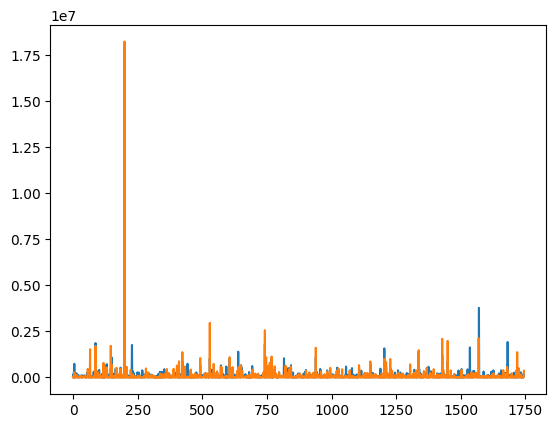

In [319]:
predicted_value = y_pred_diff['predicted_value']
validation_value = y_pred_diff['validation_value']

# 선 그래프 그리기
plt.plot(predicted_value, label='Predicted')
plt.plot(validation_value, label='Validation')

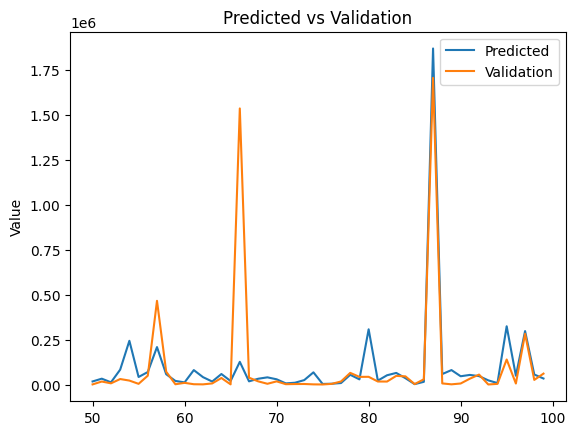

In [320]:
# 모델 50개의 값들만 보여주기
predicted_value = y_pred_diff['predicted_value'][50:100]
validation_value = y_pred_diff['validation_value'][50:100]

# 선 그래프 그리기
plt.plot(predicted_value, label='Predicted')
plt.plot(validation_value, label='Validation')
plt.ylabel('Value')
plt.title('Predicted vs Validation')
plt.legend()
plt.show()

In [321]:
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# feature_names = X.columns
# dot_data = export_graphviz(model, out_file=None,
#                            feature_names= feature_names,
#                            filled=True, rounded=True,
#                            special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree_regression")
# graph.view()

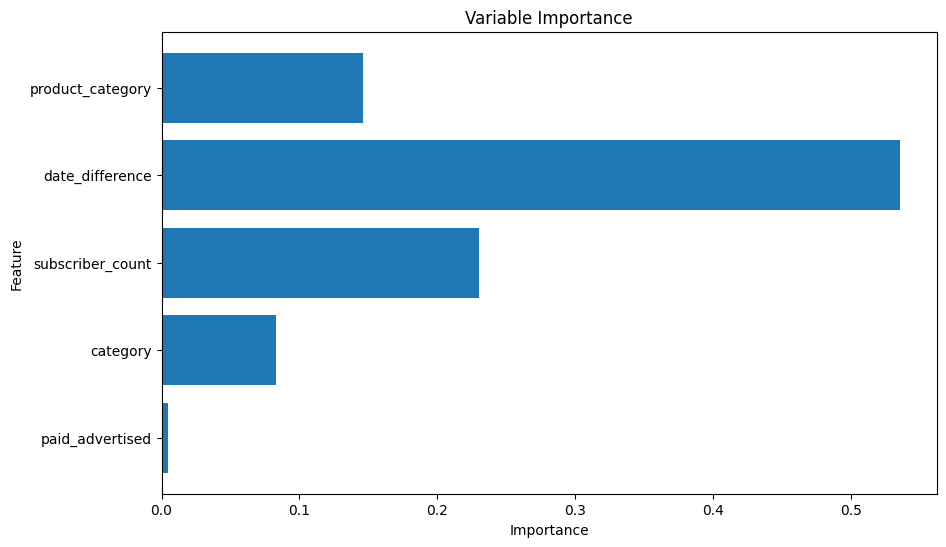

In [322]:
# 변수 중요도 시각화
feature_names = X_train.columns
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance')
plt.show()

In [323]:
import pickle
# 모델 저장
with open('randomforest.pkl', 'wb') as f:
    pickle.dump(model, f)

In [324]:
# 모델 불러오기 
with open('randomforest.pkl', 'rb') as f:
    rf = pickle.load(f)

In [325]:
rf.predict(X_test)

array([121970.04      ,  16415.34      ,    619.48012294, ...,
         8353.61      ,  32434.641     , 259628.36666667])

In [379]:
class model():
    def __init__(self, m, df):
        with open(m, "rb") as f:
            self.m = pickle.load(f)
        self.df = df
        self.preprosessing()
        self.X = self.df[['paid_advertised', 'category', 'subscriber_count', 'date_difference','product_category']]
            
    def predict(self):
        self.df['view_count'] = self.m.predict(self.X)
        df = self.df[['유튜버', 'view_count', 'budget']]
        # df.loc[df['budget'] <= self.budget]
        return df
        
    
    def preprosessing(self):
        self.df['paid_advertised'] = 1
        self.df['date_difference'] = 30
        self.df['budget'] = self.df['subscriber_count'].apply(self.get_budget)
        
        category_labels = {
            'FOOD': 1,
            'TECH': 2,
            'INFO': 3,
            'BEAUTY': 4,
            'FILM': 5,
            'FASHION': 6,
            'PET': 7,
            'FUN': 8,
            'TRAVEL': 9,
            'ECONOMY': 10,
            'ENTN': 11,
            'GAME': 12,
            'CAR': 13,
            'LIFE': 14,
            'SPORTS': 15
        }
        product_categories = [
            'Beauty and Fashion',
            'Technology',
            'Automotive',
            'Entertainment and Media',
            'Travel and Tourism',
            'Home and Lifestyle',
            'Food and Beverage',
            'Gaming',
            'Financial Services',
            'ntertainment and Media']
        category_to_number = {category: number for number, category in enumerate(product_categories)}

        self.df['category'] = self.df['category'].map(category_labels)
        self.df['category'] = self.df['category'].astype('category').cat.codes
        self.df['product_category'] = self.df['product_category'].map(category_to_number)

        
    def get_budget(self, value):
        if value <= 200000:
            return 2000
        elif value <= 400000:
            return 3000
        elif value <= 600000:
            return 3500
        elif value <= 800000:
            return 4000
        elif value <= 1000000:
            return 4500
        elif value <= 1500000:
            return 5000
        elif value <= 3000000:
            return 6000

In [380]:
m = model("randomforest.pkl", df)

In [381]:
m.df['product_category'] = 1

In [382]:
m.df['category'] = 1

In [383]:
m.X = m.df[['paid_advertised', 'category', 'subscriber_count', 'date_difference','product_category']]

In [373]:
len(m.predict())

8722

In [384]:
m.predict()

,유튜버,view_count,budget
0,유소나,219974.39,4000
1,유소나,219974.39,4000
2,유소나,219974.39,4000
3,유소나,219974.39,4000
4,유소나,219974.39,4000
...,...,...,...
8717,재호 - Fitness,48827.65,3000
8718,재호 - Fitness,48827.65,3000
8719,재호 - Fitness,48827.65,3000
8720,재호 - Fitness,48827.65,3000


In [376]:
df

,id,카테고리,검색어,유튜버,비교구독자수,구독자수,유튜버정보,제목,조회수,좋아요,...,paid_advertised,product_category,category,like_count,view_count,subscriber_count,upload_time,date_difference,like_count_mean,budget
0,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,예쁜게 죄,"조회수 203,721회","나 외에 사용자 2,345명이 이 동영상을 좋아함",...,1,1,1,2345,203721,632000,2023-05-20,30,1798.0,4000
1,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,피파천재 유소나,"조회수 55,040회",나 외에 사용자 705명이 이 동영상을 좋아함,...,1,1,1,705,55040,632000,2023-05-17,30,1798.0,4000
2,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,카드깡을 맛본 부자 누나,"조회수 211,664회","나 외에 사용자 1,829명이 이 동영상을 좋아함",...,1,1,1,1829,211664,632000,2023-05-15,30,1798.0,4000
3,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,수면마취 덜 깬 소나ㅋㅋㅋㅋㅋ,"조회수 124,988회","나 외에 사용자 1,180명이 이 동영상을 좋아함",...,1,1,1,1180,124988,632000,2023-05-12,30,1798.0,4000
4,2,['LIFE'],유소나,유소나,632000,구독자 64만명,💙광고문의 usona_official@naver.com💙,나도 가끔 이런거 입는다,"조회수 287,425회","나 외에 사용자 2,931명이 이 동영상을 좋아함",...,1,1,1,2931,287425,632000,2023-05-10,30,1798.0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8717,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,7 MIN SIXPACK ABS WORKOUT AT HOME (No Equipmen...,"조회수 7,567회",나 외에 사용자 530명이 이 동영상을 좋아함,...,1,1,1,530,7567,230000,2023-05-21,30,1012.0,3000
8718,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,15 MIN FULL BODY WORKOUT AT HOME (Fat burn | N...,"조회수 13,827회",나 외에 사용자 814명이 이 동영상을 좋아함,...,1,1,1,814,13827,230000,2023-05-14,30,1012.0,3000
8719,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,7 MIN SIX PACK ABS WORKOUT AT HOME | Beginner ...,"조회수 42,766회","나 외에 사용자 1,983명이 이 동영상을 좋아함",...,1,1,1,1983,42766,230000,2023-05-07,30,1012.0,3000
8720,2000,['CAR'],재호Fitness,재호 - Fitness,230000,구독자 25.6만명,안녕하세요 거제도에 살고 있는 트레이너이자 물리치료사 노재호입니다.\n\n건강하고 ...,"CHEST, SHOULDER & ABS WORKOUT at Home (6 Pack ...","조회수 12,736회",나 외에 사용자 666명이 이 동영상을 좋아함,...,1,1,1,666,12736,230000,2023-04-30,30,1012.0,3000
